In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import cartopy.crs as ccrs

In [2]:
def cart2sph(X, radians=True):
    """
    Cartesian to spherical coordinate operator.
    
    Parameters
    ----------
    X : array_like, (N,3) 
        Cartesian coordinates. 
    radians : bool, optional
        Whether to use radians or degrees. 
        
    Returns
    -------
    Y : array_like, (N,2)
        Spherical coordinates
    
    """
    
    Y = np.zeros((X.shape[0], 2))
    Y[:,0] = np.arctan2(X[:,1], X[:,0])   # Longitude
    Y[:,1] = np.arcsin(X[:,2])            # Latitude

    # We transforn longitude to span from 0 to 2*pi
    Y[:,0] = np.where(Y[:,0] < 0.0, Y[:,0] + 2*np.pi, Y[:,0])
    
    if not radians:
        Y *= 180. / np.pi
    return Y


In [3]:
df_data = pd.read_csv("Outputs/df_data.csv")
df_res  = pd.read_csv("Outputs/df_results.csv")
df_data.head(5)

,time,p1,p2,p3
0,3.504815,-0.038582,0.022977,-0.998991
1,4.319204,-0.102203,0.062411,-0.992804
2,10.872921,0.013006,0.134454,-0.990834
3,12.944983,-0.049857,0.186880,-0.981117
4,15.920236,-0.044382,0.312486,-0.948885


/home/jovyan/.conda/envs/paleostats/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jovyan/.conda/envs/paleostats/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jovyan/.conda/envs/paleostats/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


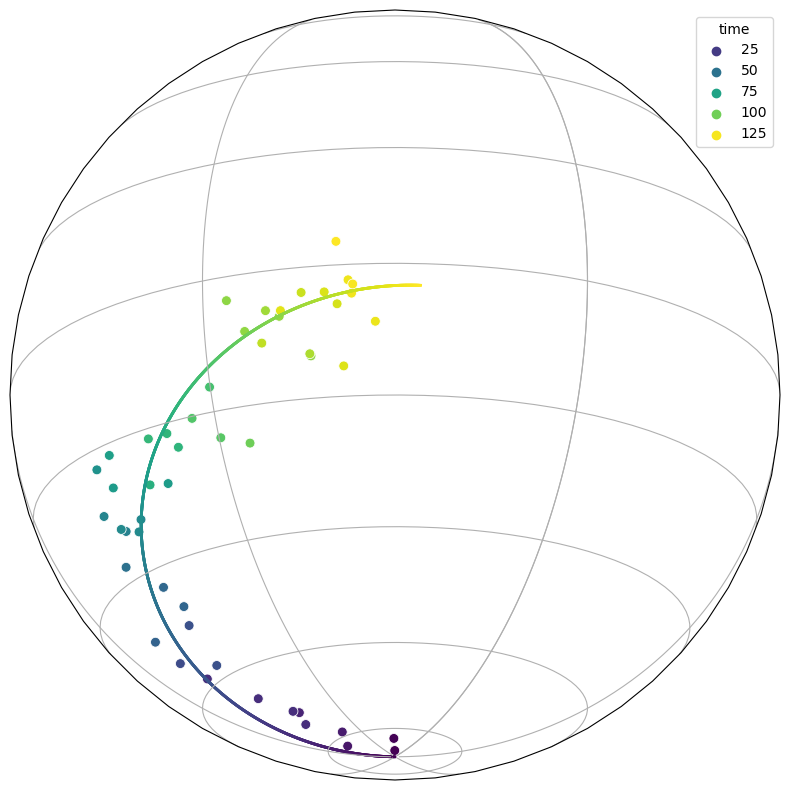

In [4]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=-20, central_longitude=150))

# ax.coastlines()
ax.gridlines()
ax.set_global()

knot_values_sph = cart2sph(df_res[['u1', 'u2', 'u3']].values, radians=False)
data_values_sph = cart2sph(df_data[['p1', 'p2', 'p3']].values, radians=False)
times = df_res.time.values


cmap = mpl.cm.get_cmap('viridis')
norm = mpl.colors.Normalize(times.min(), times.max())

for i in range(knot_values_sph.shape[0]-1):
    plt.plot([knot_values_sph[i,0], knot_values_sph[i+1,0]], 
             [knot_values_sph[i,1], knot_values_sph[i+1,1]],
             linewidth=2, color=cmap(norm(times[i])),
             transform = ccrs.Geodetic())


sns.scatterplot(ax=ax, x = data_values_sph[:,0], y = data_values_sph[:,1], 
                hue = df_data['time'], s=50,
                palette="viridis",
                transform = ccrs.PlateCarree());